# Exercise 4.9 Task 2

## Import libraries and table

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import ord_prod_cust table
df_merged = pd.read_pickle(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Data\Prepared Data\ord_prod_cust.pkl')

In [4]:
# check table
df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,65,1,1,2,8,0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,65,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,65,1,1,2,8,0,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,65,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,65,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [23]:
# find the columns of the merged table
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_mean',
       'spending_flag', 'frequency_median', 'frequency_flag', 'First Name',
       'Last Name', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge'],
      dtype='object')

## Bar chart for Order Day of Week

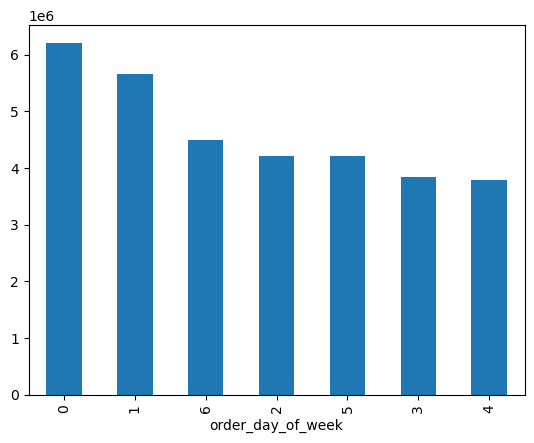

In [8]:
# create bar chart for orders per day of the week
bar_day = df_merged['order_day_of_week'].value_counts().plot.bar()

## Histogram of Prices

In [6]:
# change value of prices above 100 to nan
df_merged.loc[df_merged['prices'] > 100, 'prices'] = np.nan

In [7]:
# check max price
df_merged['prices'].max()

25.0

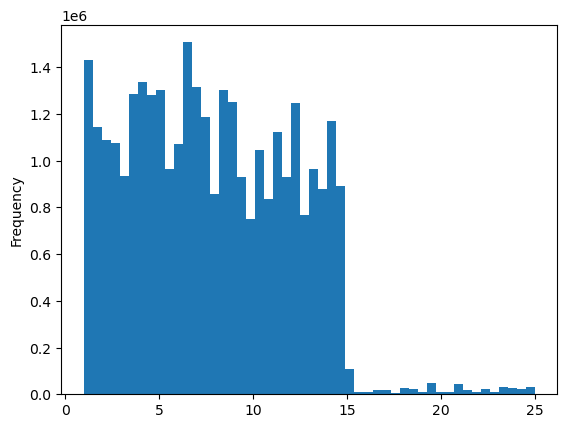

In [9]:
# create a histogram of prices 
hist_prices = df_merged['prices'].plot.hist(bins = 50)

## Scatter plot of Prices

<Axes: xlabel='prices', ylabel='prices'>

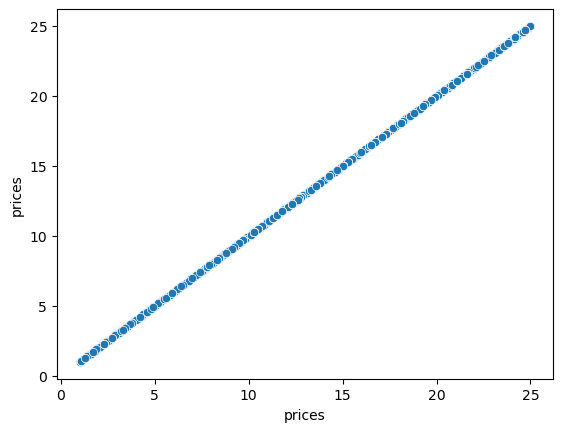

In [10]:
# create scatter plot of prices
sns.scatterplot(x = 'prices', y = 'prices', data = df_merged)

## Line plot of Order Day of Week and Prices

In [12]:
#create a 70/30 random number split
np.random.seed(4)
sample = np.random.rand(len(df_merged)) <=0.7

In [13]:
# create a large subset of merged data
large_sample = df_merged[sample]

In [14]:
# create a small subset of merged data
small_sample = df_merged[~sample]

In [15]:
# find length of the complete merged table
len(df_merged)

32435059

In [16]:
# check that the samples are complete
len(small_sample) + len(large_sample)

32435059

In [17]:
# create a small sample table with prices and order day of week columns
small_line_data = small_sample[['prices', 'order_day_of_week']]

In [18]:
# check line data small sample table
small_line_data.head()

,prices,order_day_of_week
0,9.0,2
2,4.4,2
3,4.7,2
6,3.0,3
10,4.0,3


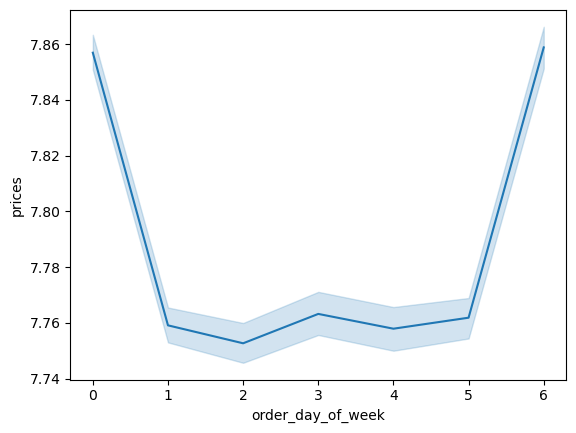

In [19]:
# create line plot of order day of week and prices
line_small = sns.lineplot(data = small_line_data, x = 'order_day_of_week', y = 'prices')

## Histogram of Order Hour

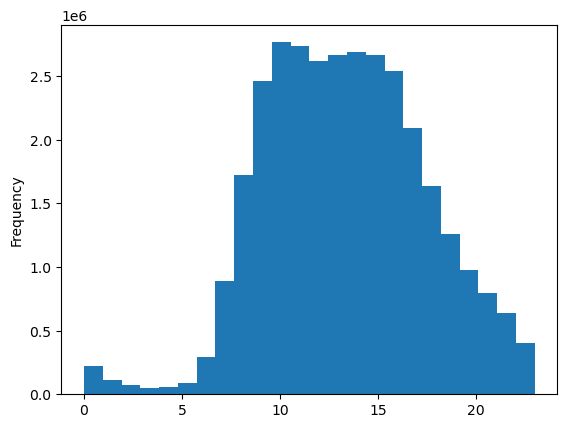

In [52]:
# create histogram for order hour
hist_hour = df_merged['order_hour'].plot.hist(bins = 24)

The histogram of order hour demonstrates the hours that the most number of sales occur.

## Bar chart of Loyalty Flag

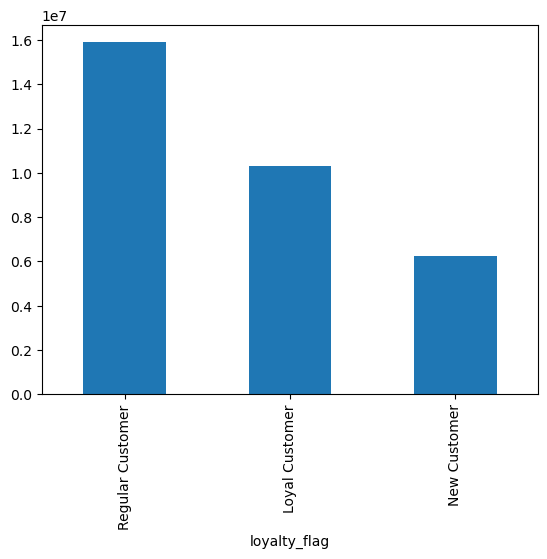

In [24]:
# create a bar chart for loyalty flag
bar_loyalty = df_merged['loyalty_flag'].value_counts().plot.bar()

## Line plot of Order Hour and Prices

In [26]:
#create a small table with prices and order hour data
small_line_hour_data = small_sample[['prices', 'order_hour']]

In [27]:
# check table 
small_line_hour_data.head()

,prices,order_hour
0,9.0,8
2,4.4,8
3,4.7,8
6,3.0,7
10,4.0,7


In [28]:
# check table size
small_line_hour_data.shape

(9729960, 2)

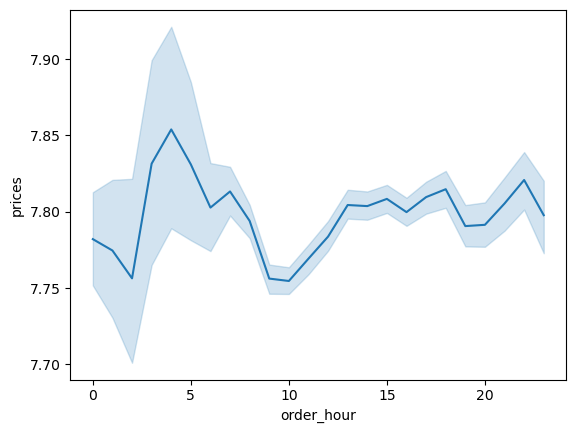

In [55]:
# create line plot for order hour and price
line_order_prices = sns.lineplot(data = small_line_hour_data, x = 'order_hour', y = 'prices')

the line plot shows that there isn't much variability in price over hours but there is one minor peak around hour 4. 

## Line plot of Age and Number of Dependants

In [31]:
# create small table with age and number of dependants
small_age_dep_data = small_sample[['Age', 'n_dependants']]

In [32]:
# check table
small_age_dep_data.head()

,Age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


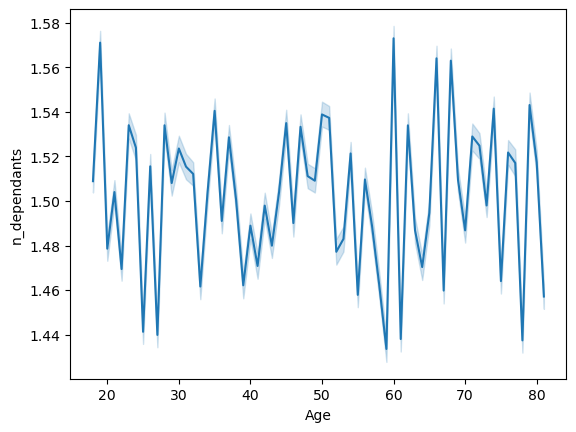

In [34]:
# create line plot of age and number of dependants
line_age = sns.lineplot(data = small_age_dep_data, x = 'Age', y = 'n_dependants')

The line plot shows that the number of dependants does not seem to coorelate with age. 

## Scatter plot of Age and Income

In [44]:
# create large table with age and income
small_age_income_data = small_sample[['Age', 'income']]

In [45]:
# check table
small_age_income_data.head()

,Age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


In [46]:
# check table size
small_age_income_data.shape

(9729960, 2)

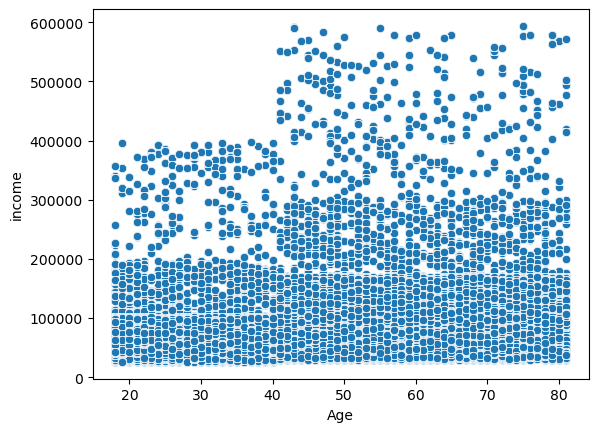

In [47]:
# create scatter plot of age and income
scatter_income = sns.scatterplot(x = 'Age', y = 'income', data = small_age_income_data)

The scatter plot shows that there is an increase in the highest and median incomes after 40 years. 

## Save images of plots

In [48]:
path = r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Visualizations'

In [49]:
bar_day.figure.savefig(os.path.join(path, 'order_day_bar.png'))

In [50]:
hist_prices.figure.savefig(os.path.join(path, 'hist_prices.png'))

In [51]:
line_small.figure.savefig(os.path.join(path, 'order_day_prices_line.png'))

In [53]:
hist_hour.figure.savefig(os.path.join(path, 'order_hour_hist.png'))

In [54]:
bar_loyalty.figure.savefig(os.path.join(path, 'loyalty_bar.png'))

In [56]:
line_age.figure.savefig(os.path.join(path, 'age_dep_line.png'))

In [57]:
scatter_income.figure.savefig(os.path.join(path, 'age_income_scatter.png'))

In [58]:
line_order_prices.figure.savefig(os.path.join(path, 'order_prices_line.png'))